In [2]:
#importing important libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,plot_roc_curve,accuracy_score

# importing dataset

In [3]:
df=pd.read_csv('Desktop/data set/Credit_Card_Default.csv')

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
#checkinng the null value
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [9]:
#weneed to rename the column names as per convinent to use
df.rename(columns={'PAY_0':'PAY_1','default.payment.next.month':'def_pay'},inplace=True)

checking nature of dataste

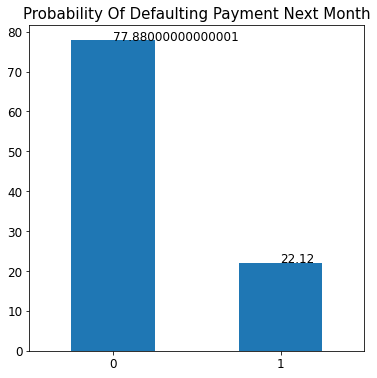

In [39]:
#checking the balancing of dataset

def_cnt = (df.def_pay.value_counts(normalize=True)*100)
def_cnt.plot.bar(figsize=(6,6))
plt.xticks(fontsize=12, rotation=0)
plt.yticks(fontsize=12)
plt.title("Probability Of Defaulting Payment Next Month", fontsize=15)
for x,y in zip([0,1],def_cnt):
    plt.text(x,y,y,fontsize=12)
plt.show()

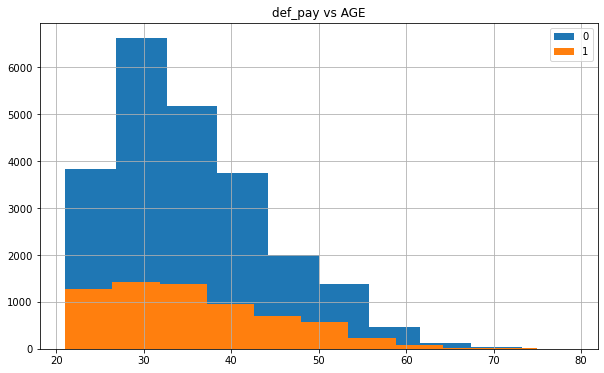

In [10]:
#checking count of defaulter basis of age

plt.figure(figsize=(10,6))
df.groupby('def_pay')['AGE'].hist(legend=True)
plt.title ('def_pay vs AGE')
plt.show()

<AxesSubplot:xlabel='LIMIT_BAL', ylabel='count'>

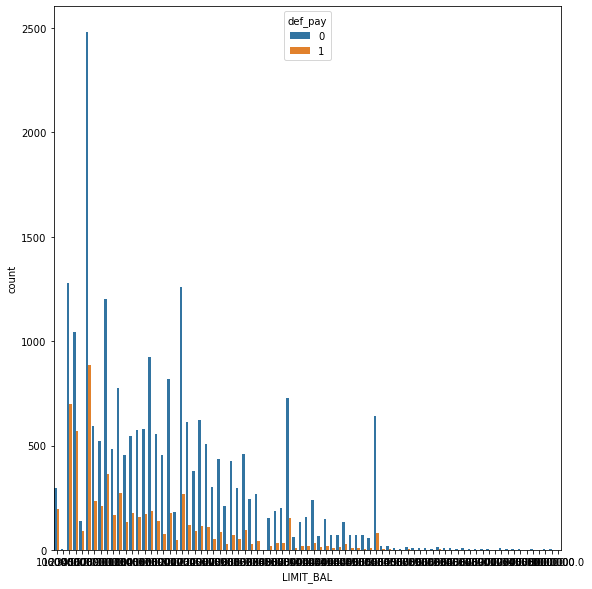

In [11]:
#checking demsity of defaulter as per limit balance so how limit of credit decides the nature of defaulter


plt.figure(figsize=(20,10))
plt.subplot(121)
sns.countplot(x='LIMIT_BAL',hue='def_pay',data=df)

C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Distribution')

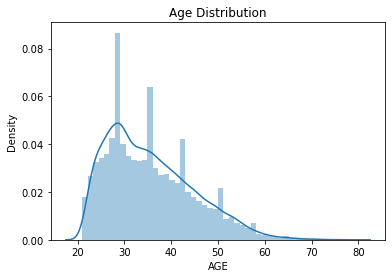

In [12]:
sns.distplot(df['AGE'])
plt.title('Age Distribution')

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

<b>Here we have 6 coloums but there are a very few entries columns 0,5,6 so we are emerging he hree columns in column 4 </b>

In [13]:
df['EDUCATION']=df['EDUCATION'].map({0:4,1:1,2:2,3:3,4:4,5:4,6:4})

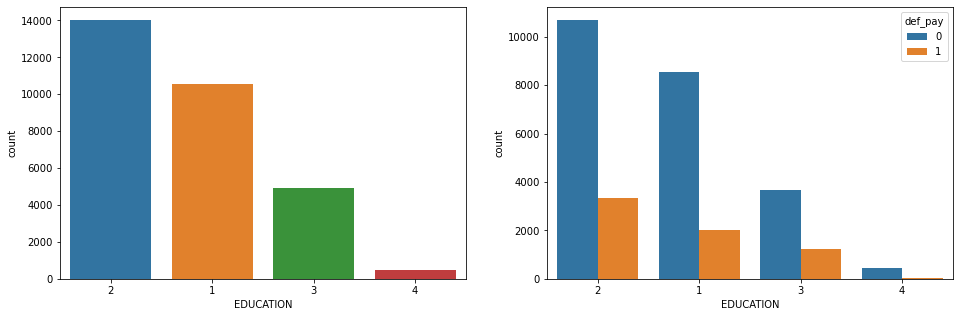

In [14]:
#checking he entries of education and also with no. of defaulterson the def_pay column
# we can have a rough idea he how education reletes itself in defaulter


plt.figure(figsize=(16,5))
plt.subplot(121)
sns.countplot(x='EDUCATION',data = df,order= df['EDUCATION'].value_counts().index)

plt.subplot(122)
sns.countplot(x='EDUCATION',data = df,hue='def_pay',  order= df['EDUCATION'].value_counts().index)


plt.show()

In [15]:
#dropiing unnecessary column
df=df.drop(['ID'],axis=1)

In [16]:
# Now we need to check orsimply shor the value of limit balance column so we can havehe  idea of people with limit balance >700000

df[df['LIMIT_BAL']>700000].sort_values(ascending=False,by='LIMIT_BAL')

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,def_pay
2197,1000000.0,2,1,1,47,0,0,0,-1,0,...,891586.0,927171.0,961664.0,50784.0,50723.0,896040.0,50000.0,50000.0,50256.0,0
18006,800000.0,1,1,2,46,-2,-2,-2,-1,-1,...,6193.0,1957.0,3175.0,4644.0,3832.0,6219.0,1961.0,3183.0,27201.0,0
14919,800000.0,1,2,1,53,-1,-1,-1,0,0,...,40814.0,12590.0,9339.0,11145.0,64657.0,131.0,247.0,9366.0,63482.0,0
28715,780000.0,2,2,2,41,-2,-2,-2,-2,-2,...,21482.0,72628.0,182792.0,62819.0,39558.0,22204.0,82097.0,184322.0,25695.0,0
24320,780000.0,1,1,1,48,0,0,0,0,0,...,195124.0,184872.0,191090.0,10000.0,15004.0,10000.0,8000.0,10028.0,7003.0,0
21375,760000.0,1,3,1,54,0,0,0,0,0,...,469931.0,474421.0,480598.0,20011.0,19500.0,19019.0,18003.0,20000.0,22000.0,0
13186,750000.0,2,1,2,28,1,-1,-1,0,0,...,399493.0,400993.0,409483.0,250000.0,401003.0,7990.0,11000.0,417990.0,3080.0,0
3733,750000.0,2,2,1,43,-1,-1,-1,-2,-1,...,63749.0,85067.0,83208.0,99664.0,74640.0,63758.0,85072.0,83215.0,124063.0,0
10089,750000.0,2,1,1,41,0,0,0,0,-1,...,75696.0,35485.0,4889.0,6817.0,2330.0,2705.0,50854.0,4913.0,550.0,0
4603,750000.0,2,3,1,40,-2,-2,-1,-1,-1,...,38488.0,9777.0,66692.0,15420.0,3691.0,38679.0,9825.0,67024.0,76641.0,0


C:\Users\Sanjeev\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


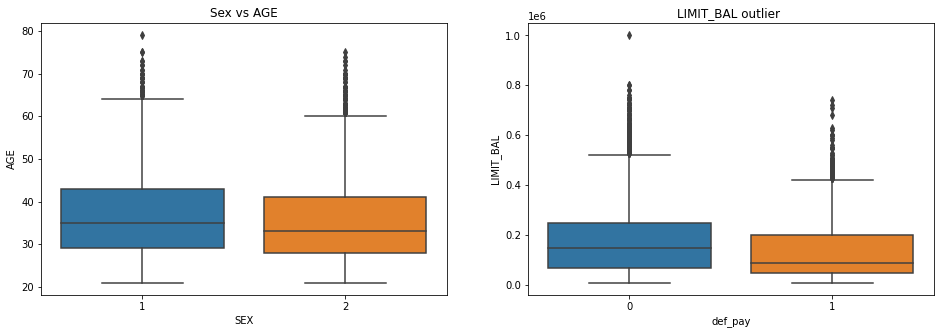

In [17]:
# Checking for he Outliers in the dataset so we need to plot columns which is very important taking part in the prediction of defaulter
# plotting he boxplot wer can analize the the presence of outlier 
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.boxplot(x='SEX', y= 'AGE',data = df)
plt.title ('Sex vs AGE')

plt.subplot(122)
ax = sns.boxplot('def_pay','LIMIT_BAL',data=df)
plt.title ('LIMIT_BAL outlier ')
labels = df['LIMIT_BAL'].value_counts()

plt.show()

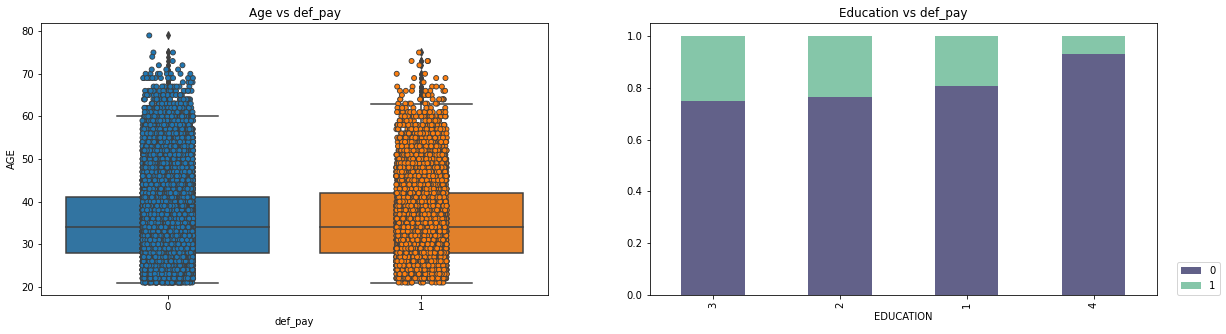

In [18]:
# comparing def_pay with Age and Education

plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='def_pay', y= 'AGE',data = df)
sns.stripplot(x='def_pay', y= 'AGE',data = df,linewidth = 0.9)
plt.title ('Age vs def_pay')

ax2=plt.subplot(1,2,2)
pay_edu = df.groupby('EDUCATION')['def_pay'].value_counts(normalize=True).unstack()
pay_edu = pay_edu.sort_values(ascending=False,by=1)
pay_edu.plot(kind='bar',stacked= True,color=["#3f3e6fd1", "#85c6a9"], ax = ax2)
plt.legend(loc=(1.04,0))
plt.title('Education vs def_pay')
plt.show()

<b>From the above,we can see that we have maximum clients from 20-30 age group followed by 31-40.</br> 
 Hence with increasing age group the number of clients that will default the payment next month is decreasing.</br> 
 Hence we can see that Age is important feature to predict the default payment for next month.</b>

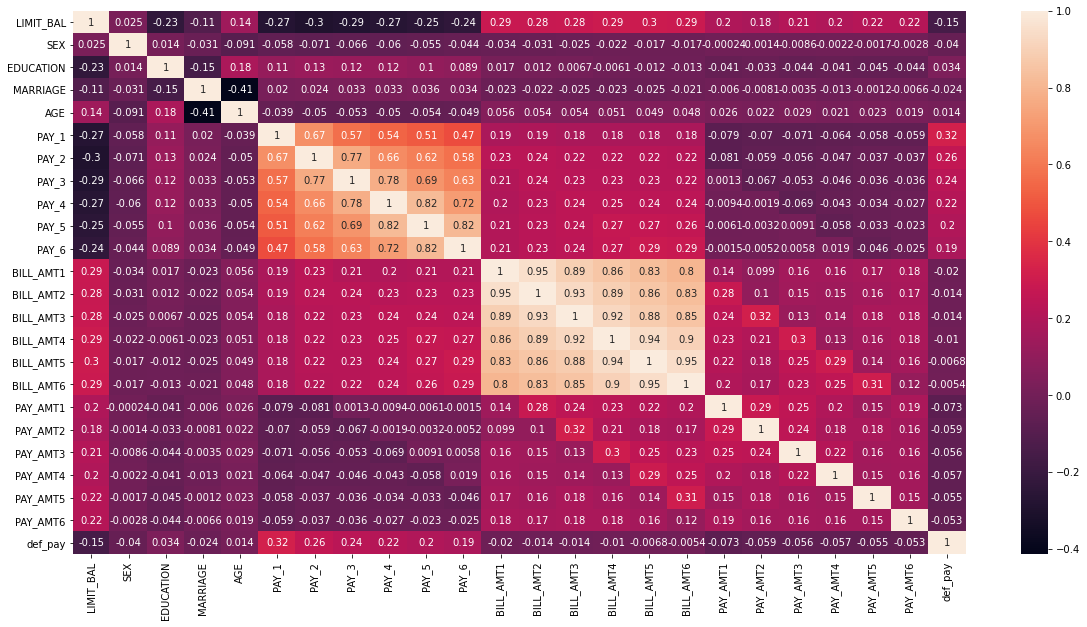

In [49]:
plt.subplots(figsize=(20,10))
corr = df.corr()
sns.heatmap(corr,annot=True)
plt.show()

<b>From this heatmap we can see that there are some multicolinearity in the data which we can handle while building the model Now we just focus on the significant features</b>

In [19]:
# we can create a new dataset with all the features have collinearity with each other.
# we combinning the datast of similler type and making a nwe dataet and checkinghe releation between them.

bill_total = pd.DataFrame(df['BILL_AMT1']+df['BILL_AMT2']+df['BILL_AMT3']+df['BILL_AMT4']+df['BILL_AMT5']+df['BILL_AMT6'],columns=['bill_total'])

pay_total =pd.DataFrame(df['PAY_1']+df['PAY_2']+df['PAY_3']+df['PAY_4']+df['PAY_5']+df['PAY_6'],columns=['pay_total'])

pay_amt_total = pd.DataFrame(df['PAY_AMT1']+df['PAY_AMT2']+df['PAY_AMT3']+df['PAY_AMT4']+df['PAY_AMT5']+df['PAY_AMT6'],columns=['pay_amt_total'])

frames=[bill_total,pay_total,pay_amt_total,df['def_pay']]
total = pd.concat(frames,axis=1)

<strong>checking with total variable effect on def_pay</strong>
through new combined dataframe we need to check he effect with the  target columns

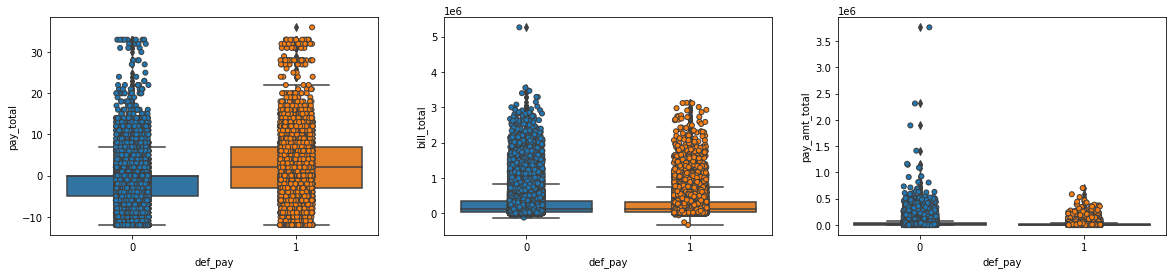

In [21]:
plt.figure(figsize=(20,4))
plt.subplot(131)
sns.boxplot(x='def_pay',y='pay_total',data = total)
sns.stripplot(x='def_pay',y='pay_total',data = total,linewidth=1)

plt.subplot(132)
sns.boxplot(x='def_pay', y='bill_total',data=total)
sns.stripplot(x='def_pay', y='bill_total',data=total,linewidth=1)

plt.subplot(133)
sns.boxplot(x='def_pay', y='pay_amt_total',data=total)
sns.stripplot(x='def_pay', y='pay_amt_total',data=total,linewidth=1)
plt.show()

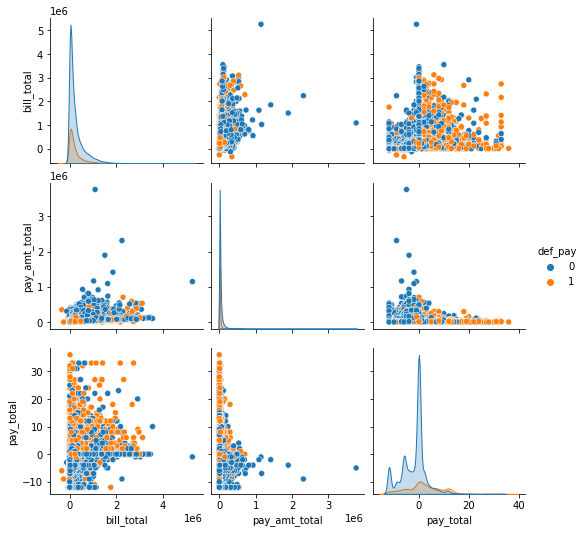

In [22]:
#checking with the pairplot

sns.pairplot(total[['bill_total','pay_amt_total','pay_total','def_pay']],hue='def_pay')
plt.show()

<AxesSubplot:xlabel='def_pay', ylabel='bill_total'>

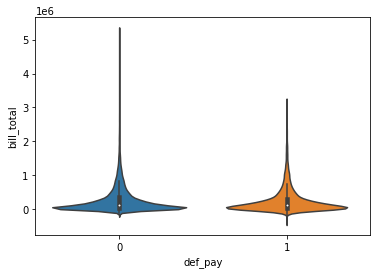

In [23]:
# checking with violen plot
sns.violinplot(x=total['def_pay'], y= total['bill_total'])

<Figure size 864x432 with 0 Axes>

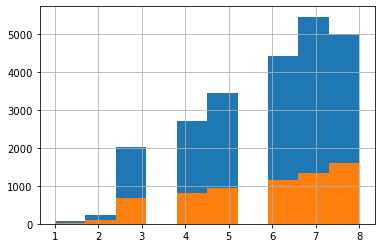

<Figure size 864x432 with 0 Axes>

In [24]:
# using the above plot we can create age bins
age = [20,27,32,37,42,48,58,64,80]
lab = [8,7,6,5,4,3,2,1]
df['AGE'] = pd.cut(df['AGE'],bins= age,labels=lab)
df.groupby('def_pay')['AGE'].hist()
plt.figure(figsize=(12,6))

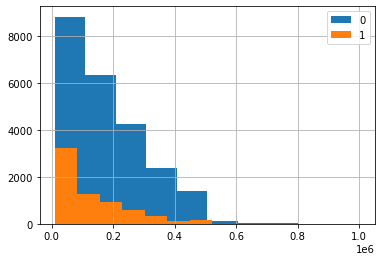

In [25]:
df.groupby('def_pay')['LIMIT_BAL'].hist(legend=True)
plt.show()

# Model

In [26]:
#seperating independent and dependent variables

X= df.drop(['def_pay' ],axis=1)
Y = df['def_pay']


In [27]:
#spliting the dependen and independent variables
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.10,random_state=1)


In [28]:
#scaling of data to make every feature in same scale  i.e mean=0,sd=1
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
# creating funtion to view confusion matrix as well as the report...
def res(y_valid):
    cm_log = confusion_matrix(y_test,y_valid)
    ConfusionMatrixDisplay(cm_log).plot()
    print(classification_report(y_test,y_valid))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      2324
           1       0.72      0.25      0.37       676

    accuracy                           0.81      3000
   macro avg       0.77      0.61      0.63      3000
weighted avg       0.79      0.81      0.77      3000



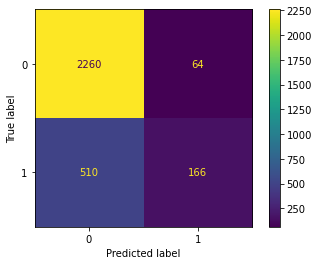

In [31]:
# Making model and fittinf and predicting value
log_model= LogisticRegression()
log_model.fit(X_train,y_train)
y_pred_log = log_model.predict(X_test)
res(y_pred_log)

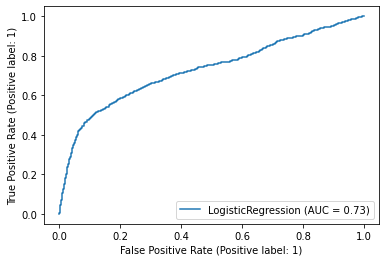

In [32]:
#ploting Roc curve 

plot_roc_curve(log_model,X_test,y_test)
plt.show()

              precision    recall  f1-score   support

           0       0.85      0.93      0.89      2324
           1       0.64      0.43      0.52       676

    accuracy                           0.82      3000
   macro avg       0.75      0.68      0.70      3000
weighted avg       0.80      0.82      0.80      3000



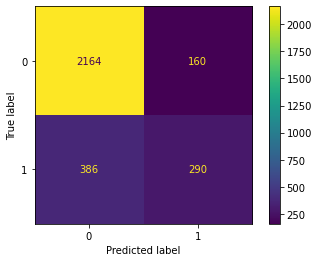

In [34]:
# applying thersiold variance and checking he accuracy
threshold = 0.36
y_log_prob =  log_model.predict_proba(X_test)
y_log_prob=y_log_prob[:,1]
y_pred_log_prob = np.where(y_log_prob>threshold,1,0)
res(y_pred_log_prob)

# Applying decision tree algo

              precision    recall  f1-score   support

           0       0.83      0.82      0.82      2324
           1       0.40      0.41      0.40       676

    accuracy                           0.73      3000
   macro avg       0.61      0.62      0.61      3000
weighted avg       0.73      0.73      0.73      3000



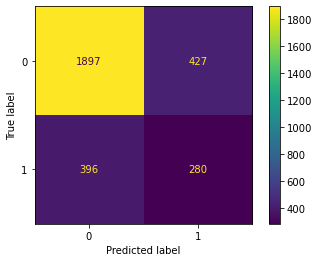

In [35]:
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train,y_train)
y_pred_dec = dec_model.predict(X_test)
res(y_pred_dec)

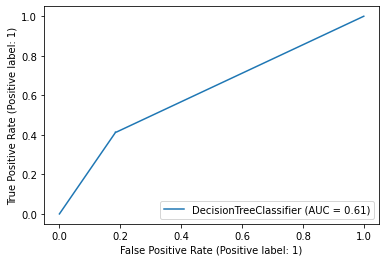

In [36]:
plot_roc_curve(dec_model,X_test,y_test)
plt.show()

# random forest

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2324
           1       0.65      0.36      0.46       676

    accuracy                           0.81      3000
   macro avg       0.74      0.65      0.67      3000
weighted avg       0.79      0.81      0.79      3000



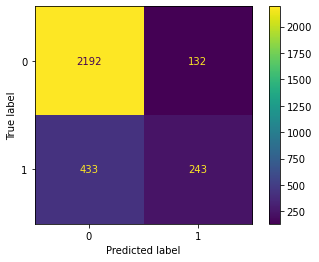

In [37]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
res(y_pred_rf)

In [42]:
# Making parameters like n_estimator,grid searchcv and evaluating them into best parameter
parameters = {'n_estimators':[70,80]}
clf = GridSearchCV(rf_model, parameters)
clf.fit(X_train,y_train)
clf.best_params_

{'n_estimators': 80}

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      2324
           1       0.65      0.38      0.48       676

    accuracy                           0.82      3000
   macro avg       0.75      0.66      0.69      3000
weighted avg       0.80      0.82      0.80      3000



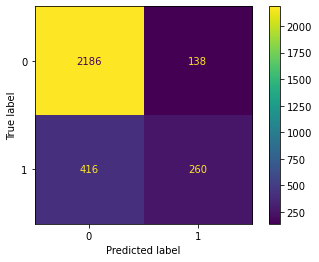

In [43]:
rf_model = RandomForestClassifier(n_estimators=80)
rf_model.fit(X_train,y_train)
y_pred_rf = rf_model.predict(X_test)
res(y_pred_rf)

# guassian naive bayes

              precision    recall  f1-score   support

           0       0.88      0.79      0.83      2324
           1       0.46      0.61      0.53       676

    accuracy                           0.75      3000
   macro avg       0.67      0.70      0.68      3000
weighted avg       0.78      0.75      0.76      3000



0.7516666666666667

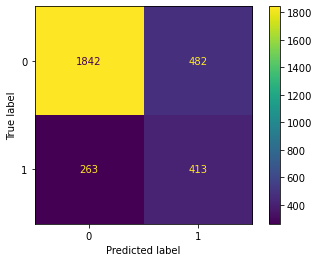

In [44]:
nb_model = GaussianNB()
nb_model.fit(X_train,y_train)
y_pred_nb = nb_model.predict(X_test)
y_predqq_nb = nb_model.predict(X_train)
res(y_pred_nb)
accuracy_nb=accuracy_score(y_test,y_pred_nb)
accuracy_nb

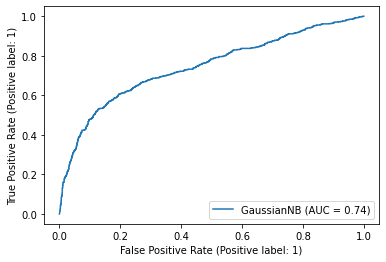

In [45]:
plot_roc_curve(nb_model,X_test,y_test)
plt.show()

In [46]:
## using SMOTE we are creating clones of y due less number of samples for 1 in it....

In [47]:
x= df.drop(['def_pay'],axis=1)
y = df['def_pay']


In [57]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.20, random_state=1)
print(np.mean(y_train==0))
print(np.mean(y_train==1))
print(len(y_train))

0.7792083333333333
0.22079166666666666
24000


In [58]:
smote = SMOTE()
x_train, y_train = smote.fit_resample(x_train,y_train)
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [60]:
# Checking or we need to deal with na values

x_train=pd.DataFrame(x_train).fillna(0)

              precision    recall  f1-score   support

           0       0.86      0.73      0.79      4663
           1       0.38      0.58      0.46      1337

    accuracy                           0.70      6000
   macro avg       0.62      0.65      0.62      6000
weighted avg       0.75      0.70      0.72      6000



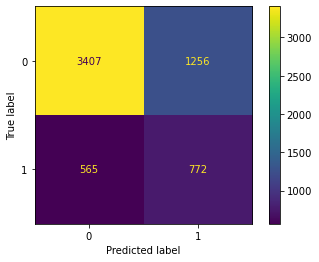

In [61]:
log_model_smote= LogisticRegression()
log_model_smote.fit(x_train,y_train)
y_pred_log_smote = log_model_smote.predict(x_test)

res(y_pred_log_smote)

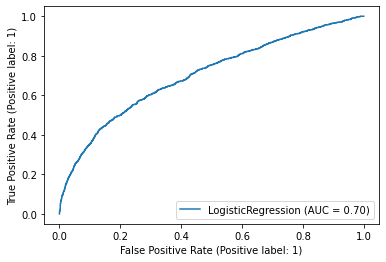

In [62]:
plot_roc_curve(log_model_smote,x_test,y_test)
plt.show()

so finally we have various models but we have to concider only those model with have good accuracy but in this case of little unblanced dataset we do  no really relay our model on accurcy but we have to check overall f1 score. 

# Guassian naive baise  model has weighted avg  f1 score 0.76  and recall is also very less 263 so we will concidered this model as best model.